<a href="https://colab.research.google.com/github/GezhinOleg/Diplom_PyDa/blob/main/diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.cluster import KMeans
from pylab import rcParams
from scipy import stats

        1. satisfaction_level - Уровень удовлетворенности работой
        2. Last_evaluation - Время с момента последней оценки в годах
        3. number_projects - Количество проектов, выполненных за время работы
        4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
        5. time_spend_company - Стаж работы в компании в годах
        6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
        7. left - уволился ли сотрудник
        8. promotion_last_5years - повышался ли сотрудник за последние пять лет
        9. department - отдел в котором работает сотрудник
        10. salary - относительный уровень зарплаты

### 1. Загрузите файл HR.csv в pandas dataframe

In [ ]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
print('Максимальный уровень удовлетворенности работой', data.satisfaction_level.max())
print('Минимальный уровень удовлетворенности работой', data.satisfaction_level.min())
print('Максимальное время с момента последней оценки в годах', data.last_evaluation.max())
print('Минимальное время с момента последней оценки в годах', data.last_evaluation.min())
print('Максимальное количество проектов, выполненных за время работы', data.number_project.max())
print('Минимальное количество проектов, выполненных за время работы', data.number_project.min())
print('Максимальное среднее количество часов на рабочем месте в месяц', data.average_montly_hours.max())
print('Минимальное среднее количество часов на рабочем месте в месяц', data.average_montly_hours.min())
print('Максимальный стаж работы в компании в годах', data.time_spend_company.max())
print('Минимальный стаж работы в компании в годах', data.time_spend_company.min())

Максимальный уровень удовлетворенности работой 1.0
Минимальный уровень удовлетворенности работой 0.09
Максимальное время с момента последней оценки в годах 1.0
Минимальное время с момента последней оценки в годах 0.36
Максимальное количество проектов, выполненных за время работы 7
Минимальное количество проектов, выполненных за время работы 2
Максимальное среднее количество часов на рабочем месте в месяц 310
Минимальное среднее количество часов на рабочем месте в месяц 96
Максимальный стаж работы в компании в годах 10
Минимальный стаж работы в компании в годах 2


In [ ]:
data[data['satisfaction_level'] == data.satisfaction_level.max()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2023,1.0,0.41,4,174,3,0,0,0,technical,low


In [ ]:
data[data['satisfaction_level'] == data.satisfaction_level.min()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
22,0.09,0.95,6,304,4,0,1,0,sales,low


In [ ]:
data[data['last_evaluation'] == data.last_evaluation.max()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
8,0.89,1.0,5,224,5,0,1,0,sales,low


In [ ]:
data[data['last_evaluation'] == data.last_evaluation.min()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2236,0.39,0.36,3,168,3,1,0,0,sales,low


In [ ]:
data[data['number_project'] == data.number_project.max()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [ ]:
data[data['number_project'] == data.number_project.min()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [ ]:
data[data['average_montly_hours'] == data.average_montly_hours.max()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
566,0.11,0.79,7,310,4,0,1,0,hr,low


In [ ]:
data[data['average_montly_hours'] == data.average_montly_hours.min()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2678,0.79,0.61,5,96,4,0,0,0,marketing,medium


In [ ]:
data[data['time_spend_company'] == data.time_spend_company.max()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
11078,0.69,0.88,3,164,10,0,0,0,management,medium


In [ ]:
data[data['time_spend_company'] == data.time_spend_company.min()].head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
50,0.13,0.78,6,152,2,0,1,0,support,low


In [ ]:
satisfaction_level_range = data.satisfaction_level.max() - data.satisfaction_level.min()
print('Размах по уровню удовлетворенности работой', satisfaction_level_range)

last_evaluation_range = data.last_evaluation.max() - data.last_evaluation.min()
print('Размах по времени с момента последней оценки в годах', last_evaluation_range)

number_project_range = data.number_project.max() - data.number_project.min()
print('Размах по количеству проектов, выполненных за время работы', number_project_range)

average_montly_hours_range = data.average_montly_hours.max() - data.average_montly_hours.min()
print('Размах по среднему количеству часов на рабочем месте в месяц', average_montly_hours_range)

time_spend_company_range = data.time_spend_company.max() - data.time_spend_company.min()
print('Размах по стажу работы в компании в годах', time_spend_company_range)

Размах по уровню удовлетворенности работой 0.91
Размах по времени с момента последней оценки в годах 0.64
Размах по количеству проектов, выполненных за время работы 5
Размах по среднему количеству часов на рабочем месте в месяц 214
Размах по стажу работы в компании в годах 8


In [ ]:
print('Средний уровню удовлетворенности работой', data.satisfaction_level.mean())
print('Среднее время с момента последней оценки в годах', data.last_evaluation.mean())
print('Среднее количество проектов, выполненных за время работы', data.number_project.mean())
print('Среднее количество часов на рабочем месте в месяц', data.average_montly_hours.mean())
print('Средний стаж работы в компании в годах', data.time_spend_company.mean())

Средний уровню удовлетворенности работой 0.6128335222348166
Среднее время с момента последней оценки в годах 0.7161017401159978
Среднее количество проектов, выполненных за время работы 3.80305353690246
Среднее количество часов на рабочем месте в месяц 201.0503366891126
Средний стаж работы в компании в годах 3.498233215547703


In [ ]:
print('Мода уровня удовлетворенности работой', data.satisfaction_level.mode()[0])
print('Мода времени с момента последней оценки в годах', data.last_evaluation.mode()[0])
print('Мода количества проектов, выполненных за время работы', data.number_project.mode()[0])
print('Мода количества часов на рабочем месте в месяц', data.average_montly_hours.mode()[0])
print('Мода стажа работы в компании в годах', data.time_spend_company.mode()[0])

Мода уровня удовлетворенности работой 0.1
Мода времени с момента последней оценки в годах 0.55
Мода количества проектов, выполненных за время работы 4
Мода количества часов на рабочем месте в месяц 135
Мода стажа работы в компании в годах 3


In [ ]:
print('Медиана уровня удовлетворенности работой', data.satisfaction_level.median())
print('Медиана времени с момента последней оценки в годах', data.last_evaluation.median())
print('Медиана количества проектов, выполненных за время работы', data.number_project.median())
print('Медиана количества часов на рабочем месте в месяц', data.average_montly_hours.median())
print('Медиана стажа работы в компании в годах', data.time_spend_company.median())

Медиана уровня удовлетворенности работой 0.64
Медиана времени с момента последней оценки в годах 0.72
Медиана количества проектов, выполненных за время работы 4.0
Медиана количества часов на рабочем месте в месяц 200.0
Медиана стажа работы в компании в годах 3.0


In [ ]:
print('Стандартное отклонение уровня удовлетворенности работой', data.satisfaction_level.std())
print('Стандартное отклонение времени с момента последней оценки в годах', data.last_evaluation.std())
print('Стандартное отклонение количества проектов, выполненных за время работы', data.number_project.std())
print('Стандартное отклонение количества часов на рабочем месте в месяц', data.average_montly_hours.std())
print('Стандартное отклонение стажа работы в компании в годах', data.time_spend_company.std())

Стандартное отклонение уровня удовлетворенности работой 0.2486306510611418
Стандартное отклонение времени с момента последней оценки в годах 0.17116911062327592
Стандартное отклонение количества проектов, выполненных за время работы 1.2325923553183857
Стандартное отклонение количества часов на рабочем месте в месяц 49.943099371284305
Стандартное отклонение стажа работы в компании в годах 1.4601362305354546


In [ ]:
print('Дисперсия уровня удовлетворенности работой', data.satisfaction_level.var())
print('Дисперсия времени с момента последней оценки в годах', data.last_evaluation.var())
print('Дисперсия количества проектов, выполненных за время работы', data.number_project.var())
print('Дисперсия количества часов на рабочем месте в месяц', data.average_montly_hours.var())
print('Дисперсия стажа работы в компании в годах', data.time_spend_company.var())

Дисперсия уровня удовлетворенности работой 0.061817200647087255
Дисперсия времени с момента последней оценки в годах 0.02929886443156327
Дисперсия количества проектов, выполненных за время работы 1.5192839143893255
Дисперсия количества часов на рабочем месте в месяц 2494.313174809979
Дисперсия стажа работы в компании в годах 2.1319978117222864


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
### Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [ ]:
data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


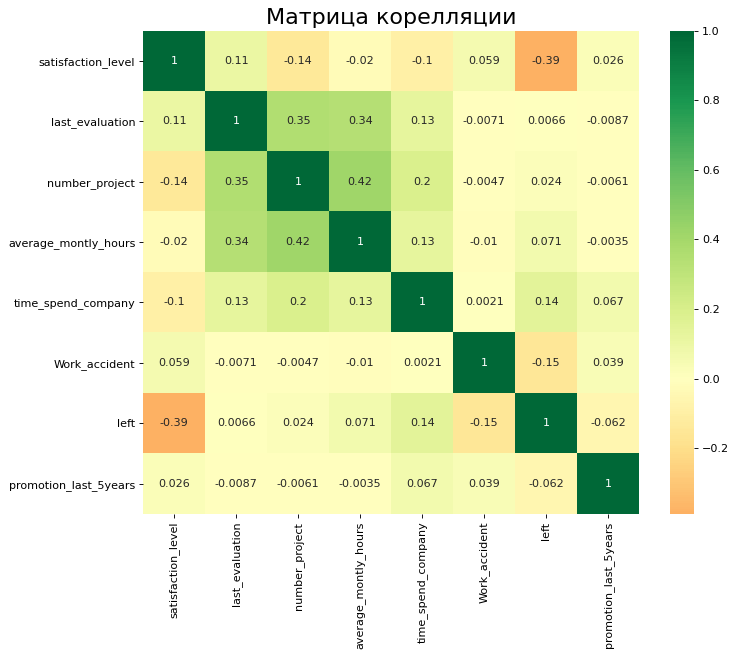

In [ ]:
# sns.heatmap(data.corr())
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корелляции', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
data[['number_project', 'average_montly_hours']].corr()

,number_project,average_montly_hours
number_project,1.000000,0.417211
average_montly_hours,0.417211,1.000000


In [ ]:
data[['number_project', 'average_montly_hours']].corr(method='spearman')

,number_project,average_montly_hours
number_project,1.000000,0.397855
average_montly_hours,0.397855,1.000000


In [ ]:
data[['number_project', 'average_montly_hours']].corr(method='kendall')

,number_project,average_montly_hours
number_project,1.000000,0.306987
average_montly_hours,0.306987,1.000000


In [ ]:
data[['satisfaction_level', 'average_montly_hours']].corr()

,satisfaction_level,average_montly_hours
satisfaction_level,1.000000,-0.020048
average_montly_hours,-0.020048,1.000000


In [ ]:
data[['satisfaction_level', 'average_montly_hours']].corr(method='spearman')

,satisfaction_level,average_montly_hours
satisfaction_level,1.000,0.062
average_montly_hours,0.062,1.000


In [ ]:
data[['satisfaction_level', 'average_montly_hours']].corr(method='kendall')

,satisfaction_level,average_montly_hours
satisfaction_level,1.000000,0.051126
average_montly_hours,0.051126,1.000000


### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
data.groupby(['department'])['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

<AxesSubplot:title={'center':'Распределение сотрудников по департаментам'}, xlabel='Департамент', ylabel='Количество'>

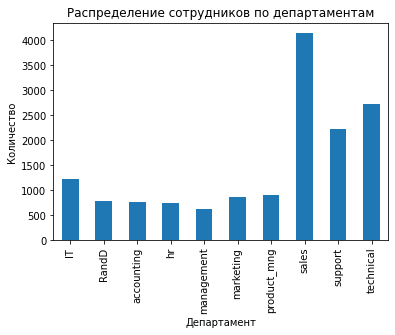

In [ ]:
data.groupby(['department'])['department'].count().plot(kind='bar',
                                                        title='Распределение сотрудников по департаментам',
                                                        xlabel='Департамент',
                                                        ylabel='Количество')

### 5. Показать распределение сотрудников по зарплатам.

In [ ]:
data.groupby(['salary'])['salary'].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

<AxesSubplot:title={'center':'Распределение размера зарплат'}, xlabel='Размер', ylabel='количество сотрудников'>

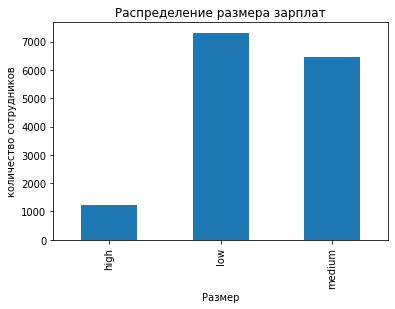

In [ ]:
data.groupby(['salary'])['salary'].count().plot(kind='bar',
                                                title='Распределение размера зарплат',
                                                xlabel='Размер',
                                                ylabel='количество сотрудников')

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

            count             
salary       high   low medium
department                    
IT             83   609    535
RandD          51   364    372
accounting     74   358    335
hr             45   335    359
management    225   180    225
marketing      80   402    376
product_mng    68   451    383
sales         269  2099   1772
support       141  1146    942
technical     201  1372   1147


<AxesSubplot:xlabel='department'>

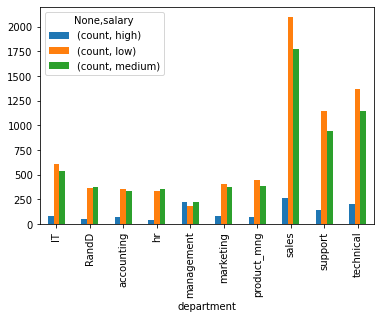

In [ ]:
s_data = data.groupby(['department', 'salary'])[['satisfaction_level']].count()
s_data.columns = ['count']
print(s_data.unstack())
s_data.unstack().plot(kind='bar')


### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
df_low = data[data['salary'] == 'low']['average_montly_hours']
df_low

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

In [ ]:
df_high = data[data['salary'] == 'high']['average_montly_hours']
df_high

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

In [ ]:
from scipy import stats
result = stats.ttest_ind(a=df_low, b=df_high, equal_var=False)
print(result)
# if (result.pvalue < alpha):
#     print('Нулевую гипотезу - отвергаем, так как время работы сотрудников с высоким и низким окладом разное')
# else:
#     print('Нулевую гипотезу - подтверждаем, сотрудники проводят на работе время одинаково')


Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)


### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
    1 Доля сотрудников с повышением за последние 5 лет
    2 Средняя степень удовлетворенности
    3 Среднее количество проектов

In [ ]:
employees = data['left'].count()
print(f' Количество сотрудников {employees}')

df_left = data.groupby(data['left'] == 1)['promotion_last_5years'].sum()
print(f' Сотрудников уволились после повышения : {df_left[1]}')

l = df_left[1]/employees*100
print(f' Доля сотрудников которые уволились, после повышения: {l.round(1)}%')

df_not_left = data.groupby(data['left'] == 0)['promotion_last_5years'].sum()
print(f' Сотрудников которые остались работать после повышения : {df_not_left[1]}')

d = df_not_left[1]/employees*100
print(f' Доля сотрудников не уволившихся после повышения: {d.round(1)}%')


 Количество сотрудников 14999
 Сотрудников уволились после повышения : 19
 Доля сотрудников которые уволились, после повышения: 0.1%
 Сотрудников которые остались работать после повышения : 300
 Доля сотрудников не уволившихся после повышения: 2.0%


In [ ]:
df_maen_left = data.groupby(data['left'] == 1)['satisfaction_level'].mean()
df_maen_left
print(f' Средняя оценка удовлетворения у тех, кто уволился: {df_maen_left[1]}')

df_maen_not_left = data.groupby(data['left'] == 0)['satisfaction_level'].mean()
df_maen_not_left
print(f' Средняя оценка удовлетворения у тех, кто не уволился: {df_maen_not_left[1]}')

 Средняя оценка удовлетворения у тех, кто уволился: 0.44009801176140917
 Средняя оценка удовлетворения у тех, кто не уволился: 0.666809590479516


In [ ]:
df_project_left = data.groupby(data['left'] == 1)['number_project'].mean()
df_project_left
print(f' Средняя количество проектов у тех, кто уволился: {df_project_left[1]}')

df_project_not_left = data.groupby(data['left'] == 0)['number_project'].mean()
#df_project_not_left
print(f' Средняя количество проектов у тех, кто не уволился: {df_project_not_left[1]}')

### 9. Разделить данные на тестовую и обучающую выборки 
    Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
    Оценить качество модели на тестовой выборке